In [17]:
#Importing required libraries 
import numpy as ny #for array

import pandas as ps #for data process

import cv2 #Capturing videos of data

import os #provide functions for interacting with operating system

import matplotlib.pyplot as mb #uses for visulizations 

import seaborn as sn #use for random distributions

import keras #use for implemention of Neural Network

from keras.models import Sequential #positionaly ordered collection of itmes

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization #layers for building blocks of Neural Networks 

from keras.preprocessing.image import ImageDataGenerator #image rotation

from sklearn.model_selection import train_test_split #splits array into subsets for train,test data 

from sklearn.metrics import classification_report,confusion_matrix #loss,score and utility functions to measure classification performance

from keras.callbacks import ReduceLROnPlateau #sets of functions to be applied at given stages of tarining procedure

        



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Importing dataset from drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#connecting folders ,files and directories
for dname, _, fnames in os.walk('content/drive'): #directories and folders
    for fname in fnames: #files and folders
        print(os.path.join(dname, fname)) #printing statment


In [21]:
#Creating Labels for training data
lbls = ['INFECTED', 'NOT INFECTED'] #Names of label
image_size = 160 #size of image
def get_training_data(data_dir): # directory for data
    DIA = [] #creating array for data
    for lbl in lbls: #loop for lables
        path = os.path.join(data_dir, lbl) #joining directory and lables
        class_number = lbls.index(lbl) #assigning index for lables
        for img in os.listdir(path): #loop for data stores in directories 
            try: #fuction 
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #storing data in array 
                resized_array = cv2.resize(image_array, (image_size, image_size)) #reshaping images
                DIA.append([resized_array, class_number]) #storing new data 
            except Exception as EXC: #Condition
                print(EXC) #if statement is false
    return ny.array(DIA) #if statemt is true it will return new data
    
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


('training images count', 5232)

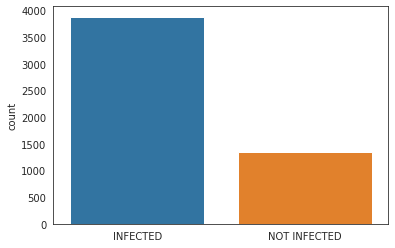

In [22]:
#array for labels 
ll= [] #creating array
for r in train: #storing train in r
    if(r[1] == 0): #condition
        ll.append("INFECTED") #label
    else: 
        ll.append("NOT INFECTED") #label
sn.set_style('white') #colour   
sn.countplot(ll) #count data for labels
"training images count",len(ll) #count and print data   


In [23]:
#creating labels for test data
lbls = ['INFECTED', 'NOT INFECTED']
image_size = 160
def get_training_data(data_dir):
    DIA = [] 
    for lbl in lbls: 
        path = os.path.join(data_dir, lbl)
        class_number = lbls.index(lbl)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(image_array, (image_size, image_size)) 
                DIA.append([resized_array, class_number])
            except Exception as EXC:
                print(EXC)
    return ny.array(DIA)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


('testing images count', 624)

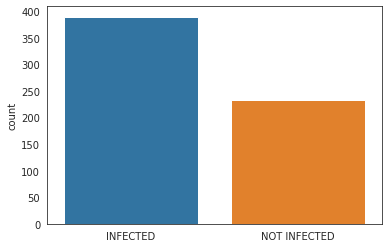

In [24]:
#array for labels
ll= []
for r in test: #storing test in r
    if(r[1] == 0):
        ll.append("INFECTED")
    else:
        ll.append("NOT INFECTED")
sn.set_style('white')       
sn.countplot(ll) 
"testing images count",len(ll)  
     



In [25]:
#creating labels for validating data
lbls = ['INFECTED', 'NOT INFECTED']
image_size = 160
def get_training_data(data_dir):
    DIA = [] 
    for lbl in lbls: 
        path = os.path.join(data_dir, lbl)
        class_number = lbls.index(lbl)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(image_array, (image_size, image_size))
                DIA.append([resized_array, class_number])
            except Exception as EXC:
                print(EXC)
    return ny.array(DIA)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


('validating images count', 16)

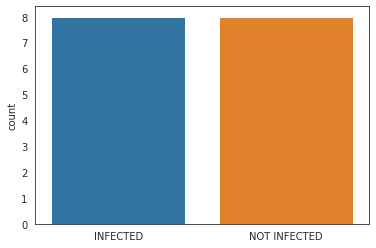

In [26]:
#array for labels
ll= []
for r in val: #storing val in r
    if(r[1] == 0):
        ll.append("INFECTED")
    else:
        ll.append("NOT INFECTED")
sn.set_style('white')       
sn.countplot(ll)       
"validating images count",len(ll)




In [27]:
#Trainig,testing and validation of data
train=get_training_data('/content/drive/MyDrive/Colab Notebooks/data/train')
test=get_training_data('/content/drive/MyDrive/Colab Notebooks/data/test')
val=get_training_data('/content/drive/MyDrive/Colab Notebooks/data/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


Text(0.5, 1.0, 'NOT INFECTED')

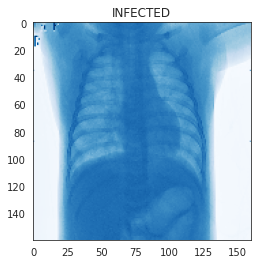

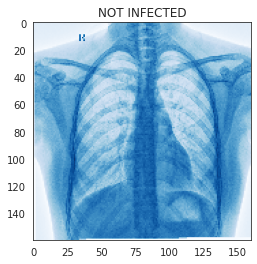

In [28]:
mb.figure(figsize = (4,4)) #contains all the plot elements
mb.imshow(train[0][0], cmap='Blues') #starting and ending array and image colour
mb.title(lbls[train[0][1]]) #return string 

mb.figure(figsize = (4,4)) #contains all the plot elements
mb.imshow(train[-1][0], cmap='Blues') #starting and ending array and image colour
mb.title(lbls[train[-1][1]]) #return string 

In [29]:
F_train = [] #sequence part of first training 
S_train = [] #sequence part of second training

F_val = [] #sequence part of first validation
S_val = [] #sequence part of first validation

F_test = [] #sequence part of first test
S_test = [] #sequence part of first test

for fs, lbl in train: #loop for feature
    F_train.append(fs) #add feature
    S_train.append(lbl) #add label

for fs, lbl in test: #loop for feature
    F_test.append(fs) #add feature
    S_test.append(lbl) #add label

for fs, lbl in val: #loop for feature
    F_val.append(fs) #add feature
    S_val.append(lbl) #add label

In [30]:
#check array with maximum array 
F_train = ny.array(F_train) / 255 #check array with maximum array for train
F_val = ny.array(F_val) / 255 #check array with maximum array for val
F_test = ny.array(F_test) / 255 #check array with maximum array for test

In [31]:
F_train = F_train.reshape(-1, image_size, image_size, 1) #reshape train image 
S_train = ny.array(S_train) #store reshaped image

F_val = F_val.reshape(-1, image_size, image_size, 1) #reshape val image 
S_val = ny.array(S_val) #store reshaped image

F_test = F_test.reshape(-1, image_size, image_size, 1) #reshape val image 
S_test = ny.array(S_test) #store reshaped image

len(F_train),len(S_train),len(F_val),len(S_val),len(F_test),len(S_test) #count train,validate and test images

(5232, 5232, 16, 16, 624, 624)

In [32]:
Data_Gen = ImageDataGenerator( #Generating new data points from existing data
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 35,
        zoom_range = 0.3,
        width_shift_range=1.5,
        height_shift_range=1.5,
        horizontal_flip = True,
        vertical_flip=False)


Data_Gen.fit(F_train)

For the data augmentation, i have chosen:
1. Rotate some training images by 35 degrees 
2. Zoom by 30% some training images
3. Move images horizontally by 15% of the width 
4. Move images vertically by 15% of the height 
5. Flip images horizontally.



In [33]:
#creating CNN model
model = Sequential() #layer has one input and output tensor
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (160,160,1)))
model.add(BatchNormalization()) #applies a transformation that maintains the mean output 
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) #switching off neurons of the network 
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten()) #Flat the layer
model.add(Dense(units = 128 , activation = 'relu'))#neurons receive input from all neurons previous layer
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy']) #compile 
model.summary() #summary of the model




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 80, 80, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 80, 80, 64)       2

In [34]:
LRR = ReduceLROnPlateau(monitor='Value_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001) #learning rate reduction

In [ ]:
history = model.fit(Data_Gen.flow(F_train,S_train, batch_size = 32) ,epochs = 10 ,validation_data = Data_Gen.flow(F_val, S_val),callbacks = [LRR]) #for supervised learning applications and learing rate reduction

Epoch 1/10
164/164 [==============================] - ETA: 0s - loss: 0.5596 - accuracy: 0.8240

164/164 [==============================] - 26s 75ms/step - loss: 0.5596 - accuracy: 0.8240 - val_loss: 25.3295 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
164/164 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.8869

164/164 [==============================] - 12s 72ms/step - loss: 0.2999 - accuracy: 0.8869 - val_loss: 31.8018 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
164/164 [==============================] - ETA: 0s - loss: 0.2331 - accuracy: 0.9188

164/164 [==============================] - 12s 72ms/step - loss: 0.2331 - accuracy: 0.9188 - val_loss: 17.7024 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
164/164 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9260

164/164 [==============================] - 12s 72ms/step - loss: 0.2026 - accuracy: 0.9260 - val_loss: 72.0974 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
164/164 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9369

164/164 [==============================] - 13s 79ms/step - loss: 0.1962 - accuracy: 0.9369 - val_loss: 0.4213 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/10
164/164 [==============================] - ETA: 0s - loss: 0.1784 - accuracy: 0.9438

164/164 [==============================] - 12s 71ms/step - loss: 0.1784 - accuracy: 0.9438 - val_loss: 1.9649 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 7/10
164/164 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9450

164/164 [==============================] - 12s 71ms/step - loss: 0.1720 - accuracy: 0.9450 - val_loss: 0.5858 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 8/10
164/164 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9457

164/164 [==============================] - 12s 72ms/step - loss: 0.1681 - accuracy: 0.9457 - val_loss: 64.6081 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 9/10
164/164 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9442

164/164 [==============================] - 12s 72ms/step - loss: 0.1602 - accuracy: 0.9442 - val_loss: 1.0183 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 10/10
 87/164 [==============>...............] - ETA: 5s - loss: 0.1491 - accuracy: 0.9505

In [ ]:
# check whether the model is fit for the given problem and corresponding data.
print("Loss of the model is : " , model.evaluate(F_test,S_test)[0]) 
print("Accuracy of the model is : " , model.evaluate(F_test,S_test)[1]*100 , "%")

In [ ]:
epochs = [r for r in range(10)] #returns a sequence of numbers 
Fig , Axe = mb.subplots(1,2) #axes that can exist in a single matplotlib figure
train_acc = history.history['accuracy'] #store accuracy of training model
train_loss = history.history['loss'] #store loss of training model
val_acc = history.history['val_accuracy'] #store accuracy of validation model
val_loss = history.history['val_loss'] #store loss of validation model
Fig.set_size_inches(20,10) #set the figure size in inches

Axe[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy') #training accuracy
Axe[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy') #validation accuracy
Axe[0].set_title('Training & Validation Accuracy') #title for axes
Axe[0].legend() #adds legend to plot
Axe[0].set_xlabel("Epochs") #for set label
Axe[0].set_ylabel("Accuracy") #for set label

Axe[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss') #training loss
Axe[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss') #training loss
Axe[1].set_title('Testing Accuracy & Loss') #title for axes
Axe[1].legend() #adds label to plot
Axe[1].set_xlabel("Epochs") #for set label
Axe[1].set_ylabel("Training & Validation Loss") #set label for training and validation
mb.show() #looks for all active figure objects and open one or more intractive windows that display figure

In [ ]:
predictions = model.predict(F_test) #enables us to predict data values of lables
predictions = predictions.flatten() #get copy of given array
classes_fs=ny.argmax(F_test,axis=1) #maximum value of class
prediction = predictions.reshape(1,-1)[0] #changing shape of an array
print(prediction[:5]) #print the prediction value


In [ ]:
cmx = confusion_matrix(S_test,(predictions > 0.5)) #classification problems where errors in the model were made
cmx

In [ ]:
cmx = ps.DataFrame(cmx , index = ['0','1'] , columns = ['0','1']) #data structure with columns of different types

In [ ]:
correct = ny.nonzero(predictions == S_test)[0] #returning non-zero value
incorrect = ny.nonzero(predictions != S_test)[0] #can not convert to a float 

In [ ]:
r = 0 #variable 
for CT in correct[:4]: #class numbers
  mb.subplot(3,2,r+1) #add to the current figure
  mb.xticks([]) #set the current location 
  mb.yticks([]) #set the current location
  mb.imshow(F_test[CT].reshape(160,160), cmap="Blues", interpolation='none') #display data
  mb.title("Predicted class {}, Real class{}".format(predictions[CT],S_test[CT])) #titles for axes
  mb.tight_layout() #adjust subplots
  r +=1 #add value 



In [ ]:
r = 0 #variable
for CT in incorrect[:4]: #class numbers
    mb.subplot(3,2,r+1) #add to the current figure
    mb.xticks([]) #set the current location
    mb.yticks([]) #set the current location
    mb.imshow(F_test[CT].reshape(160,160), cmap="Blues", interpolation='none') #display data
    mb.title("Predicted Class {},Real Class {}".format(predictions[CT], S_test[CT])) #titles for axes
    mb.tight_layout() #adjust subplots
    r += 1 #add value